In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('1인가구자료조사/2020년자료.csv',encoding='cp949')




C:\Users\USER\AppData\Local\Temp\ipykernel_9608\575984491.py:5: DtypeWarning: Columns (71,72,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1인가구자료조사/2020년자료.csv',encoding='cp949')


In [2]:
temp_df =df.copy()

In [3]:
temp_df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,202000,1,1,1,1,0,0,0,1,1,...,14517,95073,20875,0,33000,34532,0,1667,5000,1
1,202000,2,2,2,0,1,0,0,0,1,...,0,87325,53992,0,0,0,0,33333,0,1
2,202000,3,1,4,2,0,0,0,1,2,...,0,234295,66345,0,40385,60898,0,50000,16667,1
3,202000,4,1,3,3,0,0,1,0,2,...,5167,1868423,63215,0,217125,225328,829422,430000,103333,1
4,202000,5,2,3,3,0,0,0,1,2,...,3317,465232,22685,0,0,119172,290042,33333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12117,202000,12118,1,2,2,0,0,1,0,1,...,0,4176270,555360,16000,560550,343360,0,1725000,976000,0
12118,202000,12119,2,2,2,0,0,1,0,1,...,0,1230790,225075,19110,64235,282370,0,440000,200000,0
12119,202000,12120,2,5,4,0,0,1,0,2,...,25000,1335260,207780,0,193450,101430,29600,650000,153000,0
12120,202000,12121,1,3,2,0,0,1,0,2,...,0,1417340,80250,0,268420,161870,36800,500000,370000,0


In [4]:
# 변수정리  

temp_df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',
    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',
    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',
    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_가족소비관광서비스이용금액': '오락문화_가족소비관광서비스이용',
    '가계지출_소비지출_오락문화_기타오락문화서비스이용금액': '오락문화_기타오락문화서비스이용',
    '가계지출_소비지출_오락문화_영화공연관람비': '오락문화_영화공연관람',
    '가계지출_소비지출_오락문화_음반영상물구입비': '오락문화_음반영상물구입',
    '가계지출_소비지출_오락문화_여행운동관련서비스이용금액': '오락문화_여행운동관련서비스이용',
    '가계지출_소비지출_오락문화_숙박관련서비스이용금액': '오락문화_숙박관련서비스이용',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_교육비상품서비스이용금액': '교육_교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스구입비': '교육_교과서비스구입',
    '가계지출_소비지출_교육_기타교육비상품서비스이용금액': '교육_기타교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스외서구입비': '교육_교과서비스외서구입',
    '가계지출_소비지출_교육_외국어서적구입비': '교육_외국어서적구입',
    '가계지출_소비지출_교육_기타서적구입비': '교육_기타서적구입',
    '가계지출_소비지출_교육_전자교과서비스이용금액': '교육_전자교과서비스이용',
    '가계지출_소비지출_교육_기타교육서비스이용금액': '교육_기타교육서비스이용',
    '가계지출_소비지출_교육_직업훈련서비스이용금액': '교육_직업훈련서비스이용',
    '가계지출_소비지출_교육_취미서비스이용금액': '교육_취미서비스이용',
    '가계지출_소비지출_교육_미술학원서비스이용금액': '교육_미술학원서비스이용',
    '가계지출_소비지출_교육_음악학원서비스이용금액': '교육_음악학원서비스이용',
    '가계지출_소비지출_교육_기타교육학원서비스이용금액': '교육_기타교육학원서비스이용',
    '가계지출_소비지출_교육_기타교육관련서비스이용금액': '교육_기타교육관련서비스이용',
    '가계지출_소비지출_음식외식비': '음식외식비',
    '가계지출_소비지출_음식외식_외식음식비': '외식음식비',
    '가계지출_소비지출_음식외식_휴게음식비': '휴게음식비',
    '가계지출_소비지출_음식외식_음식재료비': '음식재료비',
    '가계지출_소비지출_음식외식_간식비': '간식비',
    '가계지출_소비지출_음식외식_식음료조제서비스이용금액': '식음료조제서비스이용',
    '가계지출_소비지출_음식외식_식음료종합소매업이용금액': '식음료종합소매업이용',
    '가계지출_소비지출_음식외식_농수산물구입비': '농수산물구입',
    '가계지출_소비지출_음식외식_식음료종합소매업이용비': '식음료종합소매업이용',
    '가계지출_소비지출_기타상품서비스이용금액': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비': '기타서비스금액구입',
    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '비경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금'
}, inplace=True)

temp_df.rename(columns={
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비',
    '교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',
    '기타상품서비스이용': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '기타서비스금액구입': '기타서비스금액구입',
    '비소비지출금액': '비소비지출금액',
    '비경상조세': '비경상조세',
    '연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
}, inplace=True)

In [5]:
temp_df['가구구분코드'] = temp_df['가구구분코드'].replace({1:'근로자 가구',2:'비근로자 가구'})
temp_df['노인가구여부'] = temp_df['노인가구여부'].replace({0:'아니요',1:'예'})
temp_df['배우자코드'] = temp_df['배우자코드'].replace({1:'현재(동거)',2:'비근로자 가구',3:'부재'})
temp_df['가구주_성별코드'] = temp_df['가구주_성별코드'].replace({1:'남성',2:'여성'})
temp_df['가구주_취업여부'] = temp_df['가구주_취업여부'].replace({1:'취업',2:'실업자'})
temp_df['거처구분코드'] = temp_df['거처구분코드'].replace({1: '단독주택(다세대 포함)', 2: '아파트', 3: '연립주택', 4: '다가구주택', 5: '비주거용 건물', 6: '오피스텔', 7: '기타'})
temp_df['입주형태코드'] = temp_df['입주형태코드'].replace({1: '내 집', 2: '무료주택', 3: '회사주택', 4: '임대', 5: '영구임대', 6: '보증금 월세', 7: '보증금 없는 월세'})
temp_df['소득구간코드'] = temp_df['소득구간코드'].replace({1: '100만원 미만', 2: '100~200만원', 3: '200~300만원', 4: '300~400만원', 5: '400~500만원', 6: '500~600만원', 7: '600~700만원', 8: '700만원 이상'})
temp_df['도시읍면부구분코드'] = temp_df['도시읍면부구분코드'].replace({0:'비도시', 1:'도시'})


In [6]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return '10대'
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
temp_df.loc[:, '연령대'] = temp_df['가구주_연령'].apply(age)
temp_df.head()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,비소비지출금액,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대
0,202000,1,근로자 가구,1,1,아니요,0,0,1,1,...,95073,20875,0,33000,34532,0,1667,5000,도시,30대
1,202000,2,비근로자 가구,2,0,예,0,0,0,1,...,87325,53992,0,0,0,0,33333,0,도시,70대 이상
2,202000,3,근로자 가구,4,2,아니요,0,0,1,2,...,234295,66345,0,40385,60898,0,50000,16667,도시,40대
3,202000,4,근로자 가구,3,3,아니요,0,1,0,2,...,1868423,63215,0,217125,225328,829422,430000,103333,도시,50대
4,202000,5,비근로자 가구,3,3,아니요,0,0,1,2,...,465232,22685,0,0,119172,290042,33333,0,도시,50대


전처리

In [7]:
total_expend = temp_df['소비지출']
total_expend.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12122 entries, 0 to 12121
Series name: 소비지출
Non-Null Count  Dtype
--------------  -----
12122 non-null  int64
dtypes: int64(1)
memory usage: 94.8 KB


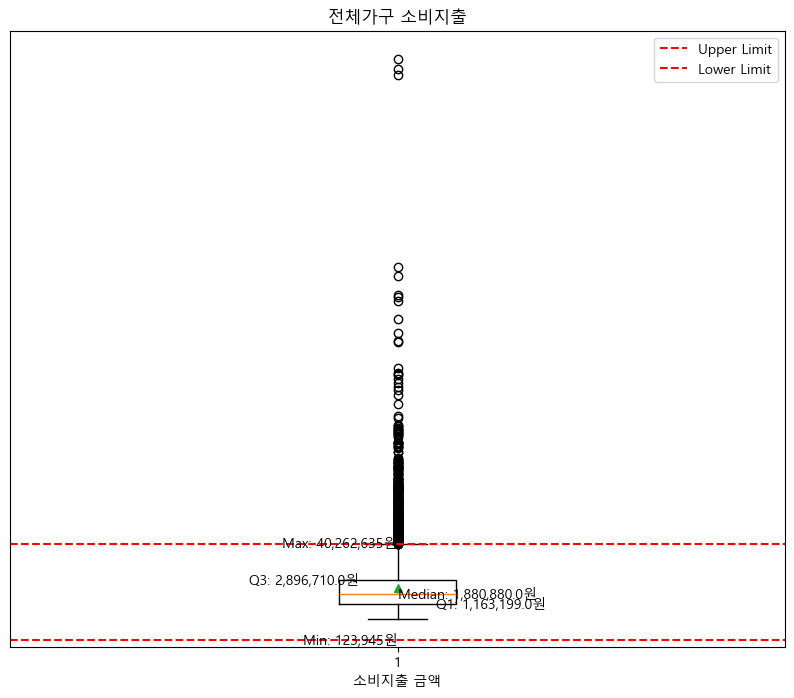

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(total_expend, 25)
Q3 = np.percentile(total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(total_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

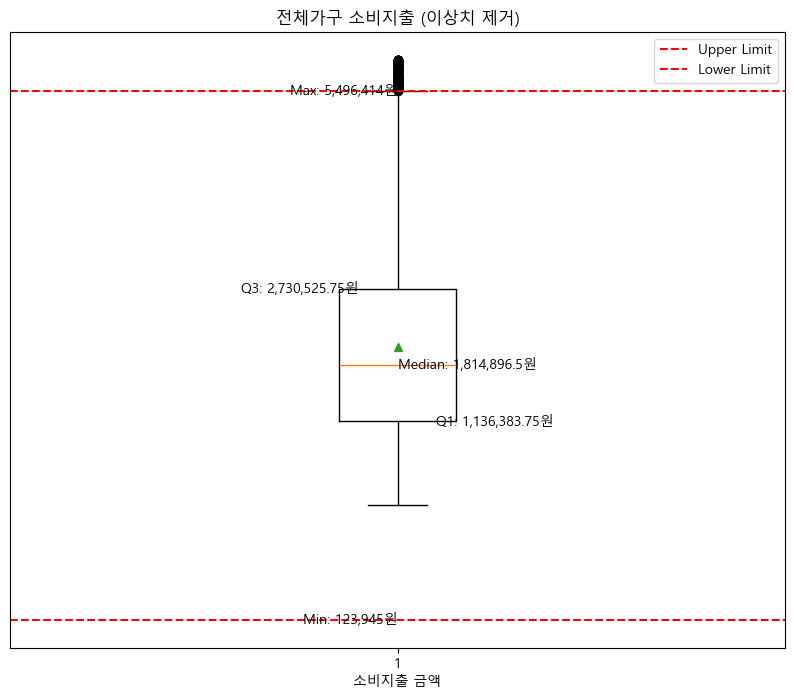

In [9]:
# 이상치 제거

# 이상치 제거
cleaned_total_expend = total_expend[(total_expend >= lower_limit) & (total_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_total_expend, 25)
Q3 = np.percentile(cleaned_total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_total_expend), f'Median: {np.median(cleaned_total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('전체가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [48]:
#전체가구 평균 소비지출
total_expend_mean = int(total_expend.mean())
print(total_expend_mean)

2294703


In [101]:
# 1인가구 소비지출 추출
single_expend= temp_df.loc[temp_df['가구원수']==1,'소비지출']

#len(single_expend)
print(type(single_expend))

<class 'pandas.core.series.Series'>


In [127]:
single_expend_mean = single_expend.mean()
single_expend_mean

1267818.0450899033

In [102]:
single_expend

0        1673542
7        1211227
11       1297083
16       2282052
17       1740520
          ...   
12103     402238
12108    1371740
12109    1605377
12115     956353
12121    1361880
Name: 소비지출, Length: 3615, dtype: int64

교통

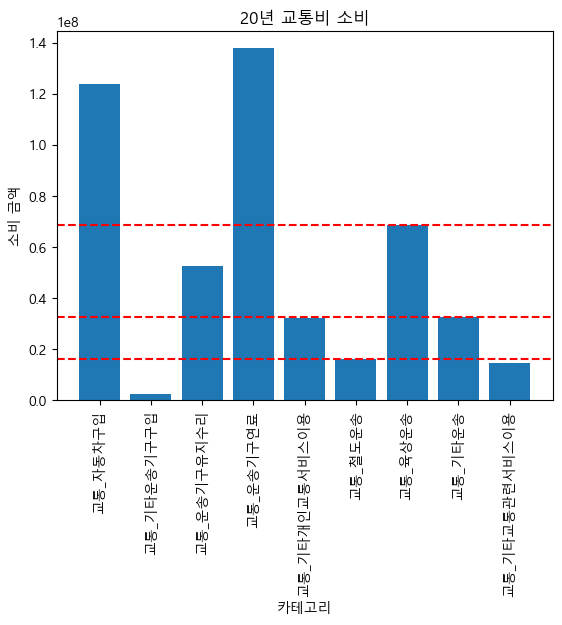

In [74]:
#그래프 그리기
import matplotlib.pyplot as plt

single_expend_list =temp_df.loc[temp_df['가구원수']==1,]


교통 = single_expend_list[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]

교통_합계 = 교통.sum()

quartile = np.percentile(교통_합계, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(교통_합계.index, 교통_합계.values)
plt.title('20년 교통비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



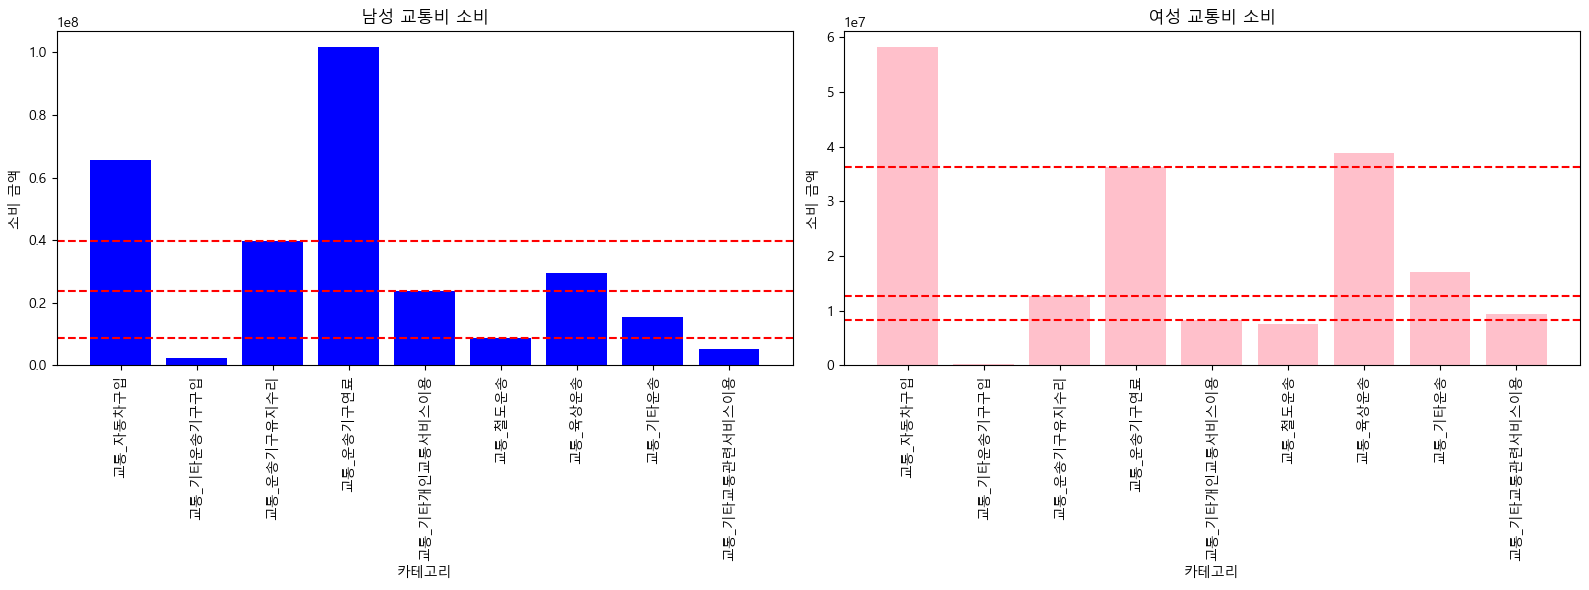

In [129]:
grouped = single_expend_list.groupby('가구주_성별코드')        #temp_df 를 가구주_성별코드로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, grouped, colors):
    교통 = data[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
               '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]
    교통_합계 = 교통.sum()
    quartile = np.percentile(교통_합계, [25, 50, 75])  # 4분위수 계산
    ax.bar(교통_합계.index, 교통_합계.values, color=color)  # 색상 설정
    ax.set_title(f'{gender} 교통비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


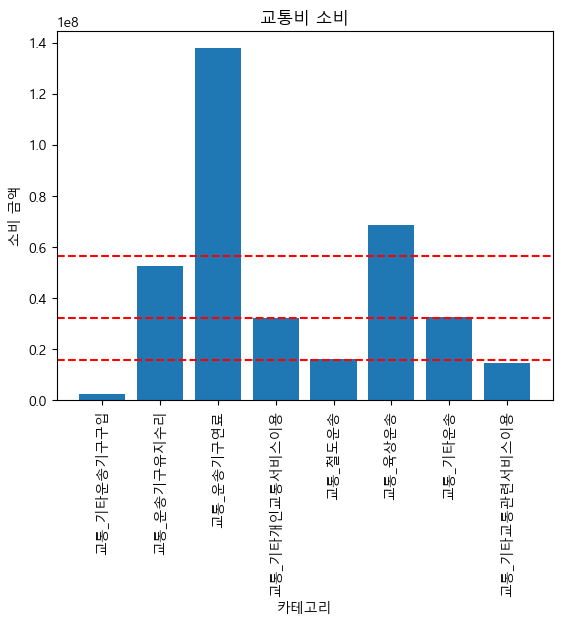

In [75]:
#자동차 구입 없을 때


colors = ['blue','pink']
교통 = single_expend_list[['교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]

교통_합계 = 교통.sum()

quartile = np.percentile(교통_합계, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(교통_합계.index, 교통_합계.values)
plt.title('교통비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')
    
    


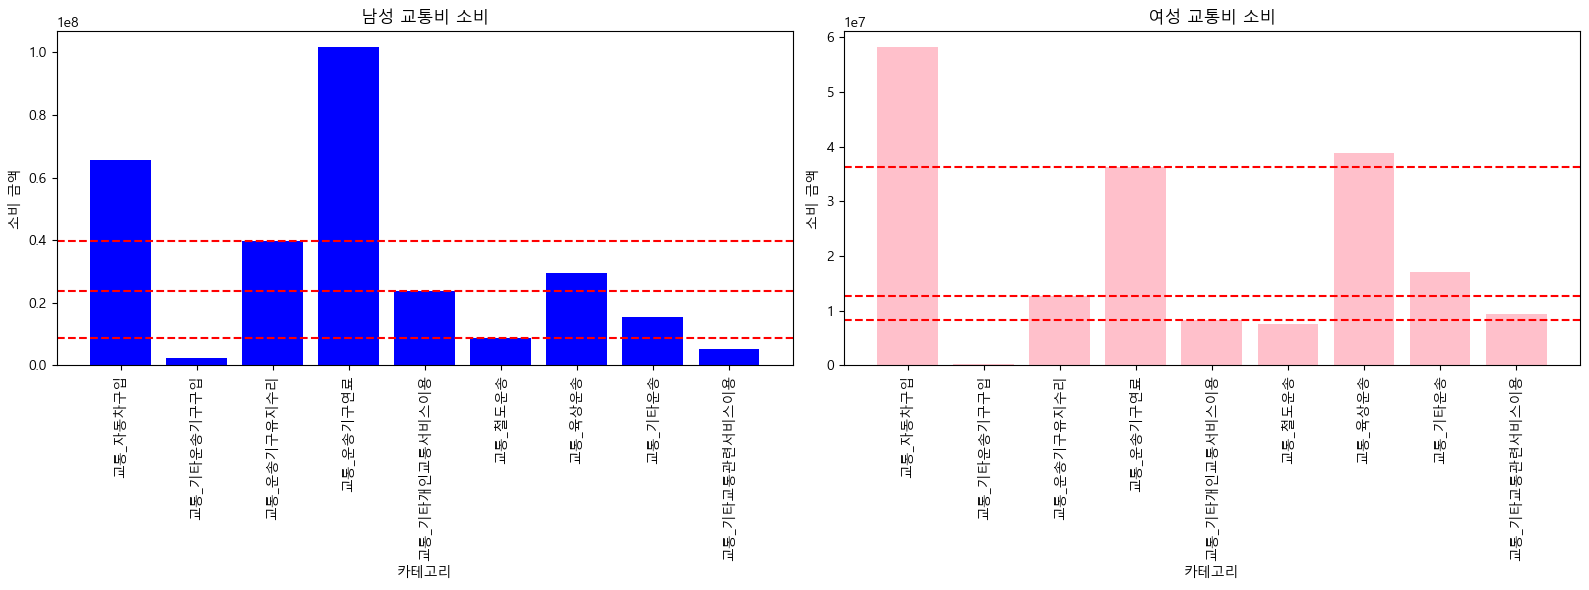

In [131]:
# 성별에 따라 데이터 그룹화
grouped = single_expend_list.groupby('가구주_성별코드')

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, grouped, colors):
    교통 = data[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
               '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]
    교통_합계 = 교통.sum()
    quartile = np.percentile(교통_합계, [25, 50, 75])  # 4분위수 계산
    ax.bar(교통_합계.index, 교통_합계.values, color=color)  # 색상 설정
    ax.set_title(f'{gender} 교통비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


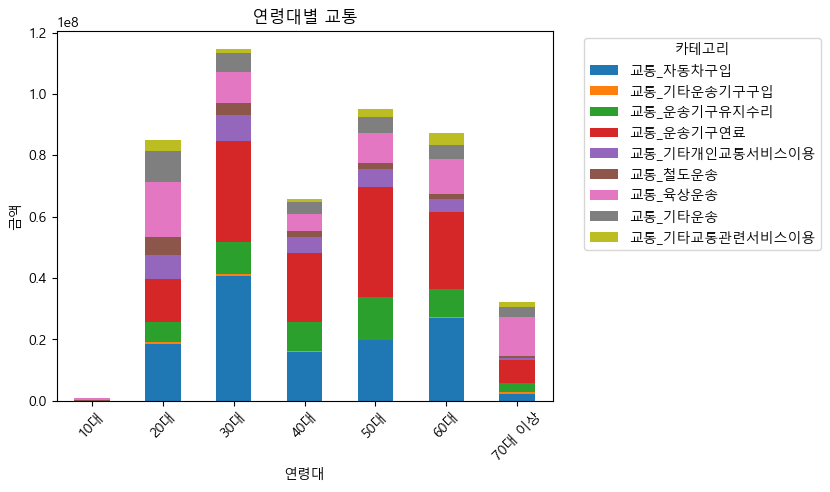

In [76]:
#연령대별로 분류

교통_연령대별 = single_expend_list.groupby('연령대')[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

#그래프 그리기
교통_연령대별.plot(kind='bar', stacked=True)
plt.title('연령대별 교통')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

# 자동차구입의 수요에 따라 그에 관련된 운송기구유지수리 or 운송기구연료가 소비가 높은걸로 보입니다


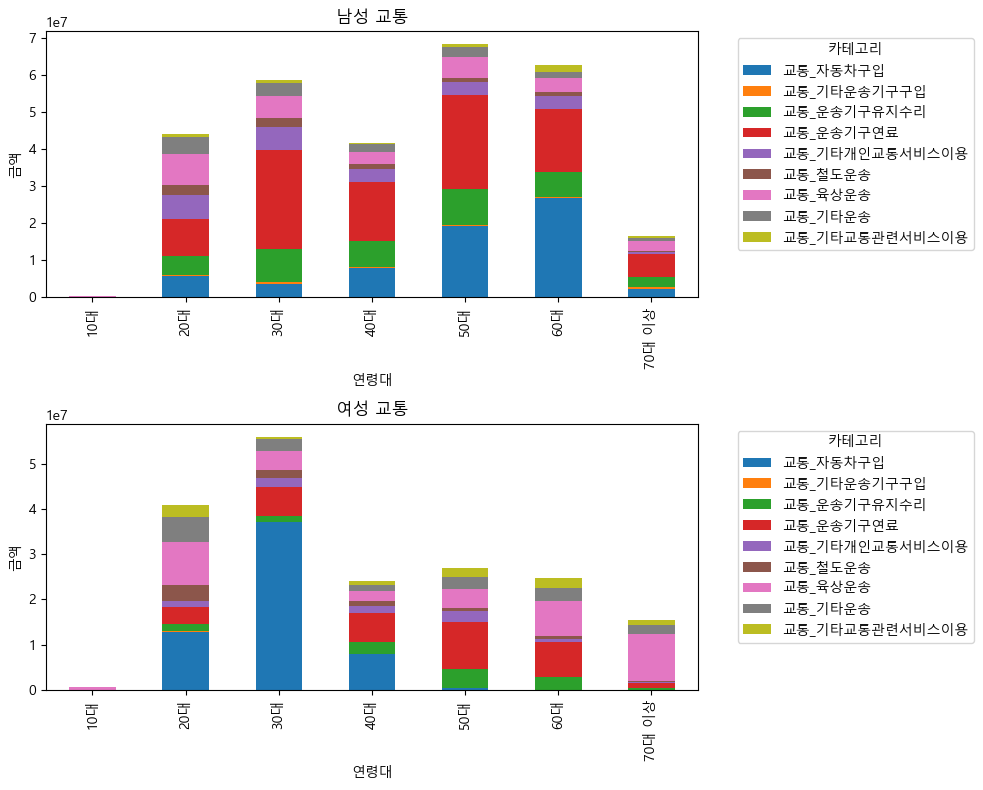

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
교통_성별연령대별 = single_expend_list.groupby(['가구주_성별코드', '연령대'])[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

# 그래프 그리기
교통_성별연령대별.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('남성 교통')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

교통_성별연령대별.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('여성 교통')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


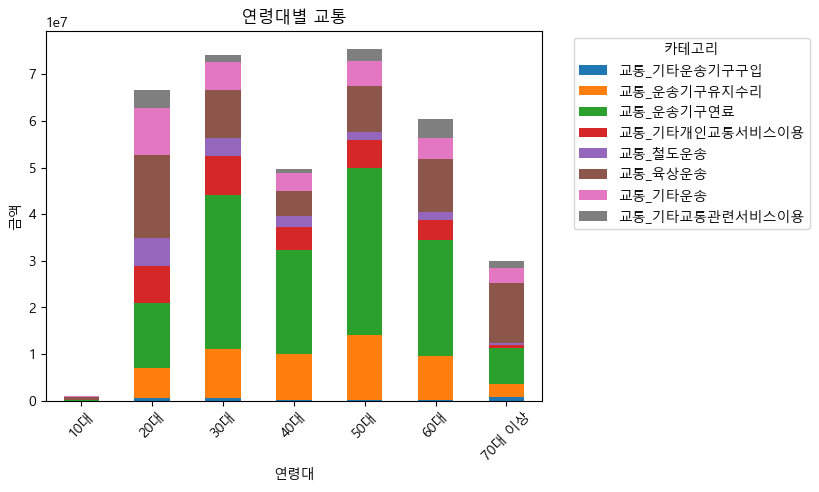

In [133]:
#연령대별로 분류 & 자동차구입비 제거

교통_연령대별 = single_expend_list.groupby('연령대')[['교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

#그래프 그리기
교통_연령대별.plot(kind='bar', stacked=True)
plt.title('연령대별 교통')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')



In [26]:
# import matplotlib.pyplot as plt

# 박스플롯 생성
# plt.figure(figsize=(10, 6))  # 그림 크기 설정
# 교통.boxplot()  # 교통 데이터프레임에 대한 박스플롯 생성
#plt.xticks(rotation=45)  # x축 라벨을 45도 회전하여 표시
#plt.title('교통 박스플롯')  # 그래프 제목 설정
#plt.xlabel('카테고리')  # x축 라벨 설정
#plt.ylabel('금액')  # y축 라벨 설정
#plt.show()  # 그래프 출력

In [27]:
#plt.figure(figsize=(10, 6))  # 그림 크기 설정
#temp_df.boxplot(column='교통비')  # 교통 데이터프레임에 대한 박스플롯 생성
#plt.xticks(rotation=45)  # x축 라벨을 45도 회전하여 표시
#plt.title('교통 박스플롯')  # 그래프 제목 설정
#plt.xlabel('카테고리')  # x축 라벨 설정
#plt.ylabel('금액')  # y축 라벨 설정
#plt.show()  # 그래프 출력

통신

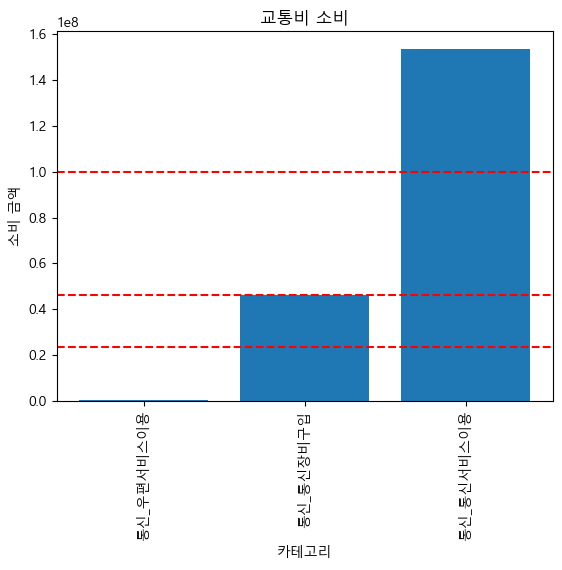

In [134]:
#그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt





통신 = single_expend_list[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']]

통신_합계 = 통신.sum()

quartile = np.percentile(통신_합계, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(통신_합계.index, 통신_합계.values)
plt.title('교통비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



오락문화

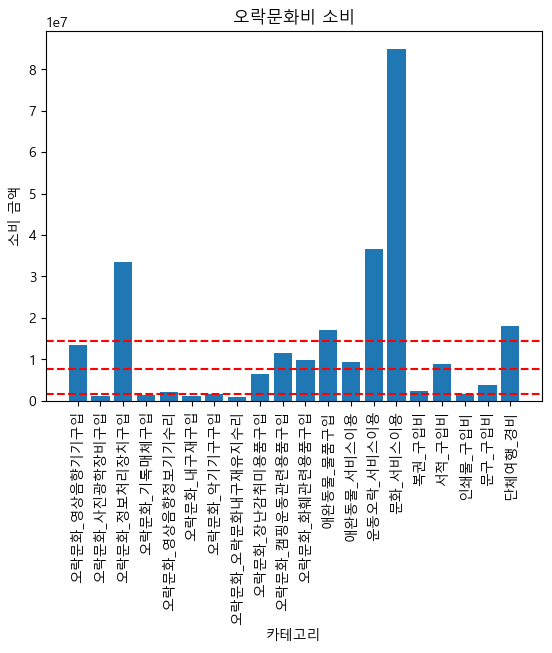

In [135]:
#그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt





오락문화 = single_expend_list[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']]

오락문화_합계 = 오락문화.sum()

quartile = np.percentile(오락문화_합계, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(오락문화_합계.index, 오락문화_합계.values)
plt.title('오락문화비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



비율 그래프

In [125]:
# 교통비 비율

total_traffic = temp_df['교통비']
total_traffic_mean = total_traffic.mean()
tatal_traffic_per = (total_traffic_mean / total_expend_mean) *100

print(f"전체가구 소비 중 교통비 비율: {total_traffic_mean:,}원 ({tatal_traffic_per:.2f}%)")


전체가구 소비 중 교통비 비율: 279,250.1353737007원 (12.17%)


In [94]:
print(total_traffic)
print(single_traffic)

0        267330
1         39167
2        183313
3        544370
4        609887
          ...  
12117    636250
12118    135270
12119    664000
12120    280000
12121     49900
Name: 교통비, Length: 12122, dtype: int64
0        267330
1         39167
2        183313
3        544370
4        609887
          ...  
12117    636250
12118    135270
12119    664000
12120    280000
12121     49900
Name: 교통비, Length: 12122, dtype: int64


In [128]:
single_traffic = single_expend_list['교통비']
single_traffic_mean = single_traffic.mean()
single_traffic_per = (single_traffic_mean/single_expend_mean)


print(single_traffic_per)

0.10491891352605322
